In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Let's map some earthquakes!

Use this notebook to complete your final project for unit 1. You'll use a "for loop" and conditionals to select the right earthquakes to plot on your map and discover something about the seismic activity in your region.

## Data Setup
In this section we'll open up our data file and turn it into a list of lists that we can work with using "for loops".

We'll be making a graph, so import the matplotlib.pyplot library with the alias plt:

In [41]:
import matplotlib.pyplot as plt

Next, we will open the data file using the open() function and then skip the first row using the .readline() function:

In [42]:
all_quakes = open("/content/drive/My Drive/Colab Notebooks/earthquake/quakes_project.txt")
all_quakes.readline()

# The \t in between each column name lets you know that this text file is separated by tabs

'YEAR\tFOCAL_DEPTH\tEQ_PRIMARY\tCOUNTRY\tSTATE\tLOCATION_NAME\tLATITUDE\tLONGITUDE\tREGION_CODE\tDEATHS\tDAMAGE_MILLIONS_DOLLARS\tHOUSES_DESTROYED\tHOUSES_DESTROYED_DESCRIPTION\tHOUSES_DAMAGED\n'

Currently our file is one long string. Let's make each line of the data file a list and put all of those lists into one big list called quakes_list. 

In [43]:
quakes_list = []
for i in all_quakes:
    quakes_list.append(i.split('\t')) # The .split() method separates the items in each line

In [44]:
print(quakes_list)

[['1800', '', '', 'MEXICO', '', '"MEXICO:  MEXICO CITY,OAXACA"', '19.2', '-99.1', '150', '', '', '', '', '\n'], ['1800', '', '', 'CANARY ISLANDS', '', 'CANARY ISLANDS:  PENON DE LA GOMERA', '28.1', '-17.1', '10', '', '', '', '', '\n'], ['1800', '', '6.5', 'IRAN', '', 'IRAN:  DAMAVAND', '36.2', '53.3', '140', '', '', '', '', '\n'], ['1801', '', '', 'MEXICO', '', 'MEXICO:  OAXACA', '17', '-96.3', '150', '7', '', '', '', '\n'], ['1801', '', '', 'SWITZERLAND', '', 'SWITZERLAND', '46.9', '8.6', '120', '', '', '', '', '\n'], ['1802', '', '', 'VENEZUELA', '', 'VENEZUELA: CUMANA', '10.3', '-64.5', '160', '', '', '', '', '\n'], ['1802', '', '', 'ANTIGUA AND BARBUDA', '', 'ANTIGUA ISLAND &  ST. CHRISTOPHER', '17.2', '-62.4', '90', '', '', '', '', '\n'], ['1802', '', '', 'ALGERIA', '', '"ALGERIA:  KOLEA, BLIDA, ALGIERS"', '36.5', '2.9', '15', '', '', '1100', '4', '1100\n'], ['1802', '', '', 'ITALY', '', 'ITALY:  SONCINO', '45.5', '10', '130', '', '', '', '', '\n'], ['1802', '150', '7.4', 'ROMANIA

Print out the length of quakes_list to see how many earthquakes are in our data file:

In [45]:
print(len(quakes_list))

4596


## Selecting your data
In this section you'll decide which data you need for your project. You'll use "for loops" and conditionals to select the right data.

You will need latitudes and longitudes for your scatter plot, so create two empty lists to hold those values:

In [46]:
africa_lat=[]
africa_long=[]

Next, decide as a group what range of years you want to look at (between 1800 and 2018). You should base your decision on the research you did on the seismic activity in your region.



You'll also need to know the "region code" for your region:
- Africa: 10
- Central America: 100
- Central and South Pacific: 170
- North America: 150
- South America: 160

Create a "for loop" that loops through the lines in quakes_list and appends the latitute and longitude to the lists you created above **if** the earthquake for that row occurred in your region and during your year range.

Hints:
- You can nest an if statement inside another if statement
- You can compare a value to two other values like this: 5 < x < 10

In [47]:
for i in quakes_list:
  if int(i[8])==10:
    if 1900 < int(i[0]) < 2000:
      africa_lat.append(float(i[6]))
      africa_long.append(float(i[7]))  

Print out the length of your latitude and longitude lists. Does this result make sense?

In [48]:
print(len(africa_lat))
print(len(africa_long))

30
30


## Making your graph
Now that you've created lists with your x data (longitude) and y data (latitude) it's time to make a scatter plot!

Replace the coordinates in plt.xlim and plt.ylim functions below as follows:
- Africa: x = (-25,50), y = (-40,45)
- Central America: x = (-100,-70), y = (0,25)
- Central and South Pacific: x = (80,180), y = (-70,30)
- North America: x = (-180,-50), y = (0,90)
- South America: x = (-120,-20), y = (-60,20)

<Figure size 432x288 with 0 Axes>

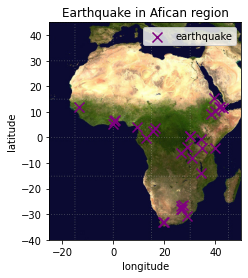

In [63]:
# This function clears any leftover plots
plt.clf()

# This code adds an image behind your plot
image = plt.imread("/content/drive/My Drive/Colab Notebooks/earthquake/earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

# This code crops the image to show only your region. 
# IMPORTANT: Replace the coordinates in plt.xlim and plt.ylim functions
# To match your region using the key above
plt.xlim(-25,50)
plt.ylim(-40,45)

# Create a scatter plot using plt.scatter(). 
# You can change the size, shape, and color of your markers! 
# Try adding s = #, marker = "symbol", and c = "color"
plt.scatter(africa_long,africa_lat, label= "earthquake", c="purple",s=100,marker="x")
plt.title("Earthquake in Afican region")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.legend()
plt.show()
# Don't forget plt.show()!


### Modify the points on your graph!
You can find the complete list of possible markers here: https://matplotlib.org/api/markers_api.html 

and the possible colors here: https://i.stack.imgur.com/lFZum.png

### Download your graph

When you're happy with your graph, you can download it to your computer using the plt.savefig() function. This function takes two arguments: whatever you'd like to name the file in a string (ex: "quakes_graph.png") and dpi=1000. The file will be downloaded to the same folder as the Jupyter Notebook file.

**Note: You will need to comment out plt.show() and rerun your graphing code before running plt.savefig().** 

plt.show() outputs the graph and prevents you from downloading it to your computer.

In [ ]:
# Example: plt.savefig("quakes_graph.png", dpi = 1000)


## Mapping tectonic plate boundaries
Copy and paste all your graphing code in the cell below. Then change replace **image = plt.imread("earth.jpg")** with **image = plt.imread("plates.png")**

Run your code and examine the results! Do you see what you expect?